# NLP Analysis on Religious Texts

Keith Kwong, 4/9/21 for DataHacks 2021

## Goal

Data science my way through religous texts

In [260]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [296]:
# read data

data_test = pd.read_csv("data/Religious_text_test.csv")
data_train = pd.read_csv('data/Religious_text_train.csv')

In [262]:
# get rid of chapters, combine data from all chapters (data pre-processing)

def rid_chapter(title):
    only_title = title.split('_')[0]
    return only_title

data_work = data_train.rename(columns = {"Unnamed: 0": "Title"})
data_work["Title"] = data_work.get('Title').apply(rid_chapter)
data_work_combined = data_work.groupby(["Title"]).sum()
data_work_combined

,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
Title,,,,,,,,,,,,,,,,,,,,,
BookOfEccleasiasticus,0,189,3,1,0,14,0,0,3,0,...,0,0,0,1,1,0,7,0,2,0
BookOfEcclesiastes,0,46,0,0,0,5,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
BookOfProverb,2,65,0,0,0,11,0,0,0,0,...,0,0,0,0,0,0,8,0,1,0
BookOfWisdom,0,32,0,0,0,1,0,0,0,1,...,2,0,0,0,0,0,7,0,0,0
Buddhism,0,0,0,0,19,0,0,0,0,0,...,0,0,0,0,0,0,9,0,0,0
TaoTeChing,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Upanishad,0,0,0,0,0,3,1,0,1,0,...,0,3,0,0,0,0,2,1,0,1
YogaSutra,0,2,1,0,0,0,0,1,0,0,...,0,0,2,0,0,1,14,4,0,1


In [304]:
# function that plots in a bar graph the 20 largest values in the data
def find_20_max(title, data):
    lst_word = []
    lst_count = []
    data_copy = data.copy()
    df = pd.DataFrame()
    for i in range(20):
        temp_max_word = data_copy.loc[title].idxmax()
        temp_max = data_copy.loc[title].max()
        lst_word += [temp_max_word]
        lst_count += [temp_max]
        data_copy = data_copy.drop(columns=[temp_max_word])
    df = df.assign(
        Word = lst_word,
        count = lst_count
    ).sort_values(by='count')
    df.plot(kind='barh',x='Word',title='20 max values in ' + title)

# the twenty most common words for all the 8 books
title_lst = list(data_work_combined.reset_index().get('Title'))
def bulk_find_20(lst, data):
    for title in lst:
        find_20_max(title, data)
# bulk_find_20(title_lst, data_work_combined)

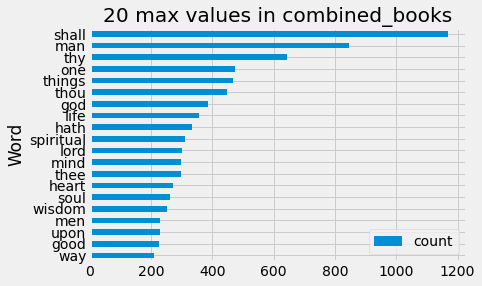

In [305]:
# top words that appear in all books combined

all_books = data_work_combined.reset_index()
all_books = all_books.assign(
    Title = all_books.get('Title').apply(lambda title: "combined_books")
).groupby('Title').sum()
data_with_all = data_work_combined.append(all_books)
all_books_20 = find_20_max('combined_books', data_with_all)

# First Prompt: Comparing books in Old Testament

## Old Testament book info
- Timeline: Proverbs --> Ecclesiastes --> Wisdom (maybe)
- Proverbs main focus: regards morality, meaning of human life
- Ecclesiastes main focus: meaning in life, fear God, sins = punishment
- Wisdom main focus: benefits of wisdom, get people to pursue it
- Proverb: 700 BC
- Ecclesiastes: 350 BC ish
- Wisdom: 50 BC

## Question
How has the wording changed?

In [306]:
# grab only old testament books and get rid of columns with only zero (none of the books have that word)

only_old = data_work_combined
only_old = only_old[only_old.index.isin(['BookOfEcclesiastes','BookOfProverb','BookOfWisdom'])]
only_old = only_old.loc[:, (only_old != 0).any(axis=0)]
only_old

,foolishness,hath,anger,convict,diadem,open,expecteth,perishing,rage,washed,...,hatest,state,regarded,lifeless,stout,taketh,erred,thinkest,thoughts,attire
Title,,,,,,,,,,,,,,,,,,,,,
BookOfEcclesiastes,0,46,5,0,0,0,0,0,0,0,...,0,5,0,0,0,1,0,1,0,0
BookOfProverb,2,65,11,0,0,12,1,0,1,1,...,0,0,1,0,1,5,0,0,8,1
BookOfWisdom,0,32,1,1,1,0,0,1,4,0,...,1,0,2,1,0,0,2,0,7,0


In [307]:
# using: sci-kit learn imports for machine learning stuff

from sklearn.feature_extraction.text import TfidfTransformer

In [308]:
# use of sklearn transformer for TF-IDF vectorization

tf_transformer = TfidfTransformer(use_idf=False).fit(only_old)
only_old_tf = tf_transformer.transform(only_old)
vectorized = only_old_tf.toarray()

# with vectorization information, can see differences by subtracting them from each other
# absolute value the data for magnitued

prov_ecc_diff = abs(vectorized[1] - vectorized[0])
ecc_wisdom_diff = abs(vectorized[0] - vectorized[2])
prov_wisdom_diff = abs(vectorized[1] - vectorized[2])

# put info into dataframe for plotting

diff_df = pd.DataFrame([prov_ecc_diff, ecc_wisdom_diff, prov_wisdom_diff], columns=only_old.columns).assign(
    Title = ['prov_ecc_diff', 'ecc_wisdom_diff', 'prov_wisdom_diff']
).set_index('Title')
diff_df

,foolishness,hath,anger,convict,diadem,open,expecteth,perishing,rage,washed,...,hatest,state,regarded,lifeless,stout,taketh,erred,thinkest,thoughts,attire
Title,,,,,,,,,,,,,,,,,,,,,
prov_ecc_diff,0.003481,0.113309,0.005467,0.000000,0.000000,0.020888,0.001741,0.000000,0.001741,0.001741,...,0.000000,0.024614,0.001741,0.000000,0.001741,0.003780,0.000000,0.004923,0.013925,0.001741
ecc_wisdom_diff,0.000000,0.110052,0.020977,0.003638,0.003638,0.000000,0.000000,0.003638,0.014550,0.000000,...,0.003638,0.024614,0.007275,0.003638,0.000000,0.004923,0.007275,0.004923,0.025463,0.000000
prov_wisdom_diff,0.003481,0.003257,0.015510,0.003638,0.003638,0.020888,0.001741,0.003638,0.012809,0.001741,...,0.003638,0.000000,0.005534,0.003638,0.001741,0.008703,0.007275,0.000000,0.011537,0.001741


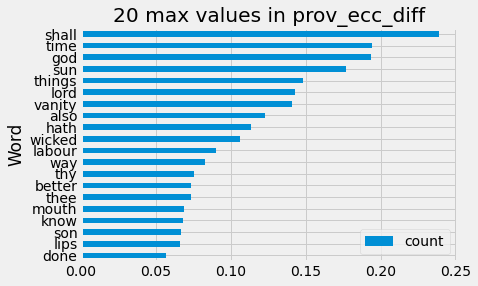

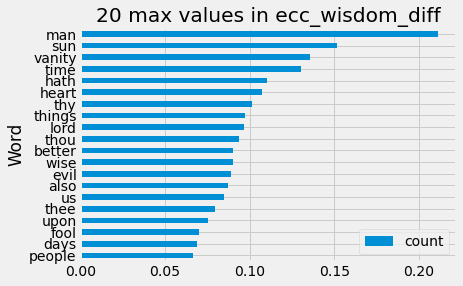

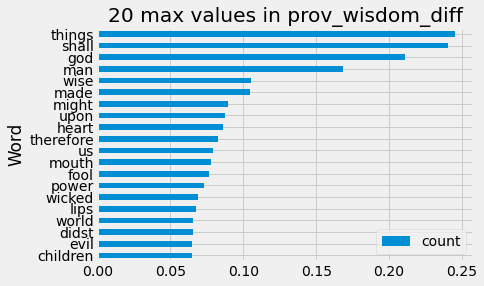

In [309]:
# plot the largest differences in word use for each comparison

bulk_find_20(list(diff_df.index), diff_df)

<BarContainer object of 3 artists>

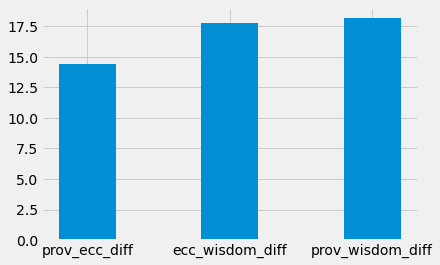

In [310]:
# final step: sum all differences, compare changes

prov_ecc_diff_sum = diff_df.loc['prov_ecc_diff'].sum()
ecc_wisdom_diff_sum = diff_df.loc['ecc_wisdom_diff'].sum()
prov_wisdom_diff_sum = diff_df.loc['prov_wisdom_diff'].sum()
diff_sum_lst = [prov_ecc_diff_sum, ecc_wisdom_diff_sum, prov_wisdom_diff_sum]
plt.bar(list(diff_df.index), diff_sum_lst, 0.4)

# Second Prompt: Buddhism/Taoism's influence on each other

## Buddhism outside research
- https://www.infoplease.com/encyclopedia/religion/eastern/buddhism/buddhism/basic-beliefs-and-practices#:~:text=The%20basic%20doctrines%20of%20early,the%20cessation%20of%20suffering%2C%20the
- four noble truths:
    - existence is suffering
    - suffering has a cause
    - there is cessation in suffering
    - there is a path to the cessation of suffering (eightfold path)
        - right views, resolve, action, speech, livelihood, effort, mindfulness, concentration
- living beings trapped in cycle of life-death, reicarnation based on physical/mental actions, breaking cycle = nirvanan
- foundation = meditation/observance of moral precepts (no killing, no eating at improper times etc.)

## Taoism outside research
- https://www.nationsonline.org/oneworld/Chinese_Customs/taoism.htm#:~:text=Taoist%20thought%20focuses%20on%20genuineness,%2C%20transformation%20and%20omni-potentiality.
- focuses: 
    - genuineness, longevity, health, immortality, vitality
    - wu wei (non-action, a natural action, a perfect equilibrium with tao)
    - detachment, refinement (emptiness), spontaneity, transformation and omni-potentiality.
- based on idea of single central organizing universal principle
- tao meaning: path, way, method, principle
- nothing in Universe is static, constantly changing with time

## Hypothesis
Because Buddhism and Taoism have had an influence on each other, their word usage will be very similar and the word frequencies for both their books will be less than 5% apart.

In [313]:
# grab only buddhism/taoism texts, get rid of data where both are zero

only_b_t = data_work_combined.reset_index()
only_b_t = only_b_t[only_b_t['Title'].isin(['Buddhism','TaoTeChing'])].set_index('Title')

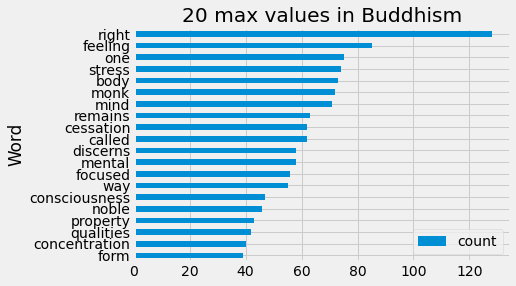

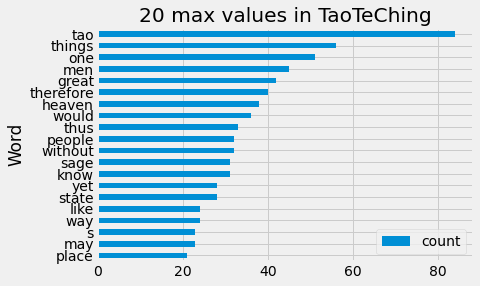

In [312]:
# look at the top twenty words in each for some basic information

bulk_find_20(list(only_b_t.index), only_b_t)